# Risk Model Matrix


---


### Data to use

* API Call of Feels Like Temperature
> https://open-meteo.com/en/docs#latitude=33.5102&longitude=36.2913&hourly=&daily=apparent_temperature_max&timezone=Africa%2FCairo&forecast_days=3

* 3-Day Forcecasted Feelslike Temp Max (3DFTM)
* 3DFTM + 5
* 3DFTM - 10

* Risk Score

In [ ]:
import requests

# The API URL
api_url = "https://api.open-meteo.com/v1/forecast?latitude=33.5102&longitude=36.2913&daily=apparent_temperature_max&timezone=Africa%2FCairo&forecast_days=3"
# Make the API call
response = requests.get(api_url)

# Assign the response to a variable
forecast_data = response.json()

In [ ]:
forecast_data

{'latitude': 33.5,
 'longitude': 36.3125,
 'generationtime_ms': 0.05996227264404297,
 'utc_offset_seconds': 10800,
 'timezone': 'Africa/Cairo',
 'timezone_abbreviation': 'EEST',
 'elevation': 704.0,
 'daily_units': {'time': 'iso8601', 'apparent_temperature_max': '°C'},
 'daily': {'time': ['2023-10-05', '2023-10-06', '2023-10-07'],
  'apparent_temperature_max': [24.5, 30.0, 28.7]}}

In [ ]:
current = forecast_data['daily']
current

{'time': ['2023-10-05', '2023-10-06', '2023-10-07'],
 'apparent_temperature_max': [24.5, 30.0, 28.7]}

In [ ]:
hottest = max(forecast_data['daily']['apparent_temperature_max'])

### Max Feels Like Temperature of the Days

In [ ]:
feelslike = []
for temp in current['apparent_temperature_max']:
  feelslike.append(temp)

feelslike

[27.2, 22.6, 29.3]

In [ ]:
hottest = max(feelslike)
hottest

29.3

### Risk Score

Output from model:

In [ ]:
risk_score = 'Very High Risk'

In [ ]:
riskscore = 'Very High Risk'


# Risk Matrix Plot for Damascus

In [ ]:
import warnings

warnings.filterwarnings("ignore")

<ipython-input-17-f8319c48fb2c>:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=colors), label="Risk Level")
<ipython-input-17-f8319c48fb2c>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(["", "", "Low Risk", "At Risk", 'High Risk', 'Very High Risk'])


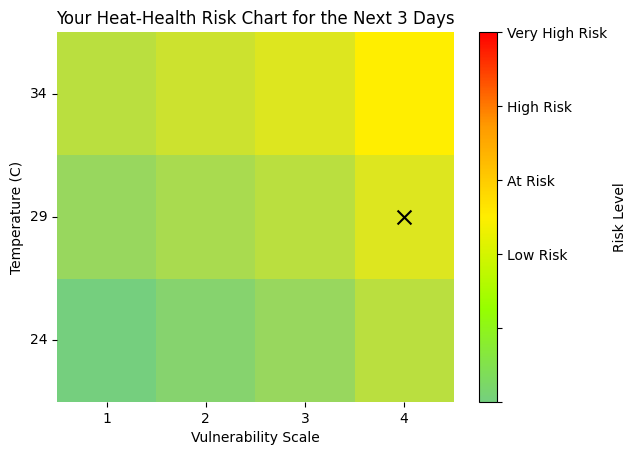

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

highest = int(hottest + 5) # +5 because highest temp av = 36.5 and 36.5+5 was recorded as a heatwave in Damascus

lowest = int(hottest - 5)


x_labels = [1, 2, 3, 4]
y_labels = [highest, hottest, lowest]
risk_matrix = np.array([[(highest+lowest)/2, (((highest+lowest)/2)+((highest+hottest)/2))/2,(highest+hottest)/2, highest],[(hottest+lowest)/2, ((hottest+lowest)/2+hottest)/2, hottest, (hottest+highest)/2], [lowest, (lowest+(lowest+hottest)/2)/2,(lowest+hottest)/2, (lowest+highest)/2]])

colorscale = {42:'#FF0000', 41:'#FF2200', 40:'#FF4400', 39: '#FF6600', 38:'#FF8800', 37: '#FF9900', 36: '#FFBB00', 35: '#FFCC00', 34: '#FFEE00', 33: '#FFFF00', 32: '#E1FF00', 31: '#C8FF00', 30: '#96FF00', 29: '#75CF7E'}

high = '#75CF7E'
low = '#75CF7E'
for temp,hex in colorscale.items():
  if int(highest) > 42:
    high = colorscale[42]
  if int(lowest) > 42:
    high = colorscale[42]
  if int(highest) == temp:
    high = colorscale[temp]
  if int(lowest) == temp:
    low = colorscale[temp]

colors = sns.color_palette(f"blend:{low},{high}", as_cmap=True)
# Create a heatmap plot with a viridis colormap and custom labels
sns.heatmap(risk_matrix, cmap= colors, xticklabels=x_labels, yticklabels=y_labels, cbar=False)

x_label_to_highlight = riskscore # X-label
if riskscore == 'Low Risk':
  x_index = 0
if riskscore == 'At Risk':
  x_index = 1
if riskscore == 'High Risk':
  x_index = 2
if riskscore == 'Very High Risk':
  x_index = 3

y_label_to_highlight = hottest # Y-label1
y_index = y_labels.index(y_label_to_highlight)


plt.scatter(x_index+0.5, y_index+0.5, color='black', marker='x', s=100)

plt.xlabel("Vulnerability Scale")
plt.ylabel("Temperature (C)")
plt.yticks(rotation = 0)
# Set the title
plt.title(f"Your Heat-Health Risk Chart for the Next 3 Days")

# Show the plot
# Add a legend
colors = sns.color_palette(f"blend:#75CF7E,#96FF00,#FFEE00,#FF9900,#FF0000", as_cmap=True)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=colors), label="Risk Level")
cbar.set_ticklabels(["", "", "Low Risk", "At Risk", 'High Risk', 'Very High Risk'])
plt.show()
